In [85]:
# Implementation of Batch Gradient Descend with early stopping for Softmax Regression
# Loading the data
import numpy as np
from  sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:,(2,3)] # Petal length, petal width
# [:, (2, 3)] : here ':' means all rows (keeping all 150 samples), (2, 3) -> means column 2 and 3 only[i.e. we select column 3 and 4].
y = iris.target


In [86]:
X_with_bias = np.c_[np.ones([len(X)]), X]
# The length of the array is for the array (150,2) is '150', : 
# np.ones([len(X)])  -> Creates 1D array of ones of length equal to the no: of samples.
# np.c_[...]  : concatantes arrayss column-wise.

In [ ]:
np.random.seed(2042)
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

# these lines make sure to avoid the  bias (by selecting the data at random)
X_train = X_with_bias[rnd_indices[:train_size]]  # Includes only the first part of the data, first train_test indices. 
y_train = y[rnd_indices[:train_size]]    # [rnd_indices][:train_size] -> Gives first train_sizes indices from this shufled list.

#  these are the train set: Selecting rows with bias, select the same rows from y -> y_train.

# Validation set: 

# Middle part of the shuffled indices. From train_size up to but not including the last test_size indices
# Select those rows from X_with_bias = X_valid , Select the same rows from y -> y_valid. 
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

# Test set: last test_size indices from shuffled list
# Select those rows from X_with_bias -> X_test , Select the same rows from y -> y_test
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
# A Function that converts the vector of class indices into a matrix  containing a one_hot vector for 
# each  instance
def to_one_hot(y):
    n_classes = y.max() + 1  # Finds the no: of unique classes
    m = len(y)
    Y_one_hot = np.zeros((m , n_classes))  # createsa zero matrix whose shape (m,n_classes).
    Y_one_hot[np.arange(m), y] = 1  # creates a one hot encoded matric where each row has one 1 and rest are 0s.
    return Y_one_hot

# this function converts a class label y into one-hot-encoded format


In [89]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [90]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
# Creating a target class probabilities matrix for the training set and test set
# creates a one_hot encoded matrix for train, valid and test sets.
Y_train_one_hot= to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [92]:
# Implementing the softmax function: (Note: Look at text for mathematical model)
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1,keepdims=True)
    return exps / exp_sums

In [93]:
n_inputs = X_train.shape[1] #== 3 (2 features plus the bias term )
n_outputs = len(np.unique(y_train)) # == 3 (3 iris classes)

In [94]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918712
5000 0.3956780375390374


In [95]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [96]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(0.9666666666666667)

In [ ]:
# Now we add some l2 regularization: The following code is similar to 
# the one above, but the loss now has an additional l2 penalty, and the gradients have proper 
# additional term.Also we increase the learning rate eta.  
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.rand(n_inputs, n_outputs)

for iterations in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba +  epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[:1]))  # exlcuding the first term which is zero
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

5000 1.8233825119710985
5000 1.327670836015202
5000 1.1093417921611022
5000 1.0643698536475452
5000 1.0531754419543295
5000 1.0461233283236113
5000 1.0402387755364346
5000 1.0348674610388544
5000 1.0297806672510919
5000 1.0248857047448925
5000 1.0201412080720693
5000 1.015526942573607
5000 1.0110319758120159
5000 1.006649724269774
5000 1.0023757623102691
5000 0.9982068021261659
5000 0.9941401935437173
5000 0.9901736651916001
5000 0.986305183130685
5000 0.9825328695979012
5000 0.9788549541658584
5000 0.9752697432971317
5000 0.9717756008301666
5000 0.9683709352183411
5000 0.9650541910695215
5000 0.9618238434864066
5000 0.9586783942599275
5000 0.955616369301562
5000 0.9526363169092441
5000 0.9497368065958747
5000 0.9469164282976246
5000 0.944173791837957
5000 0.9415075265628293
5000 0.9389162810893329
5000 0.93639872312828
5000 0.9339535393537368
5000 0.931579435301063
5000 0.9292751352809001
5000 0.9270393823005867
5000 0.9248709379872915
5000 0.922768582509051
5000 0.9207311144912482
50

In [98]:
# checking the performance of the model
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

In [ ]:
# Adding early stopping, for this we need to measure the loss on the validation set
# at every iteration and stop when the error starts growing.
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # Regularization hyperparameter
best_loss = np.inf

Theta = np.random.randn(n_inputs, n_outputs)
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]),alpha * Theta[1:]]
    # Calculating the gradient.   X_train.T.dot(error) -> matrix multiplication.. 1/m -> average of all samples (m = no: of examples)
    # np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]] -> This is L2 regularization (ridge penalty)
    
    # alpha * Theta[1:] -> apply regularization strength  to the weights
    # np.zeros([1, n_outputs]) -> keeps the bias term unregularized
    # np.r_[...] -> vertically stacks all zeros rows on top of the regularization terms.
    
    # These lines add penalty to the weights (but not to the bias) to prevent ovarfittiing
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss  = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1 , best_loss)
        print(iteration , loss, "early_sopping!") 
        break       

0 2.321301510772945
500 0.5453345960639396
1000 0.5361602239129443
1500 0.533394487167191
2000 0.5326336654017507
2350 0.532543523038523
2351 0.5325435239182013 early_sopping!


In [ ]:
logits = X_valid.dot(Theta)  # The 'dot' means we're working on matrix
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

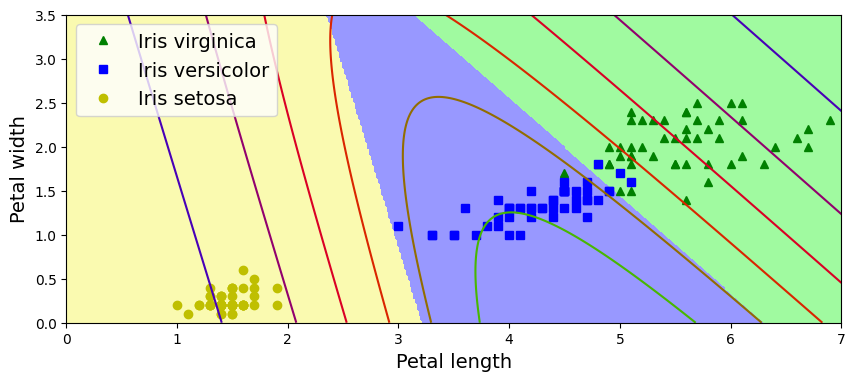

In [ ]:
import matplotlib.pyplot as plt
# Plotting the model's prediction on the whole dataset
X0, X1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
# the above lines creates a grid of coord: over 2D space. That can later used for plotting the decision boundaries and the like. 
X_new = np.c_[X0.ravel(), X1.ravel()]  # .ravel() flattens 2D array into 1D array.
#np.c_[...] --- creates column stacks, thus the line creates a single matrix of (x, y) points by flattening the X and Y grid coord: and stacking them as columns. 
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]
# np.ones([len(X_new), 1]) -> creates a column of ones with same number of rows as X_new.
# np.c_[...] -> Column stacks the ones  to the left of feature matrix x_new.

# so if X_new has shape (10000, 2) -> just x and y values, then X_new_with_bias will've shape (100000, 3) -> one bias column + x + y



logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(X0.shape)
zz = y_predict.reshape(X0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2,1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1,1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0,1], "yo", label="Iris setosa")


from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(X0, X1, zz, cmap=custom_cmap)
contour = plt.contour(X0, X1, zz1, cmap=plt.cm.brg)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)

plt.axis([0, 7, 0, 3.5])
plt.show()

In [104]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

np.float64(0.9333333333333333)